In [6]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import math
from PIL import Image, ImageFilter
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from skimage.transform import (hough_line , hough_line_peaks)
from PIL import Image, ImageOps

In [98]:
# Opening the image (R prefixed to string
# in order to deal with '\' in paths)
image_org = Image.open(r"goal4.png")

# Converting the image to grayscale, as edge detection 
# requires input image to be of mode = Grayscale (L)
image = image_org.convert("L")
# image = ImageOps.invert(image)

# Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
image = image.filter(ImageFilter.FIND_EDGES)
  
# Saving the Image Under the name Edge_Sample.png
# image.save(r"Edge_Sample.png")

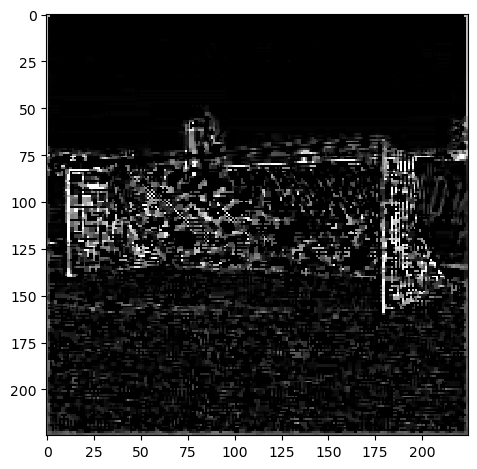

[-6.283185307179586, -6.283185307179586, -6.219718788925247, -6.251452048052417]


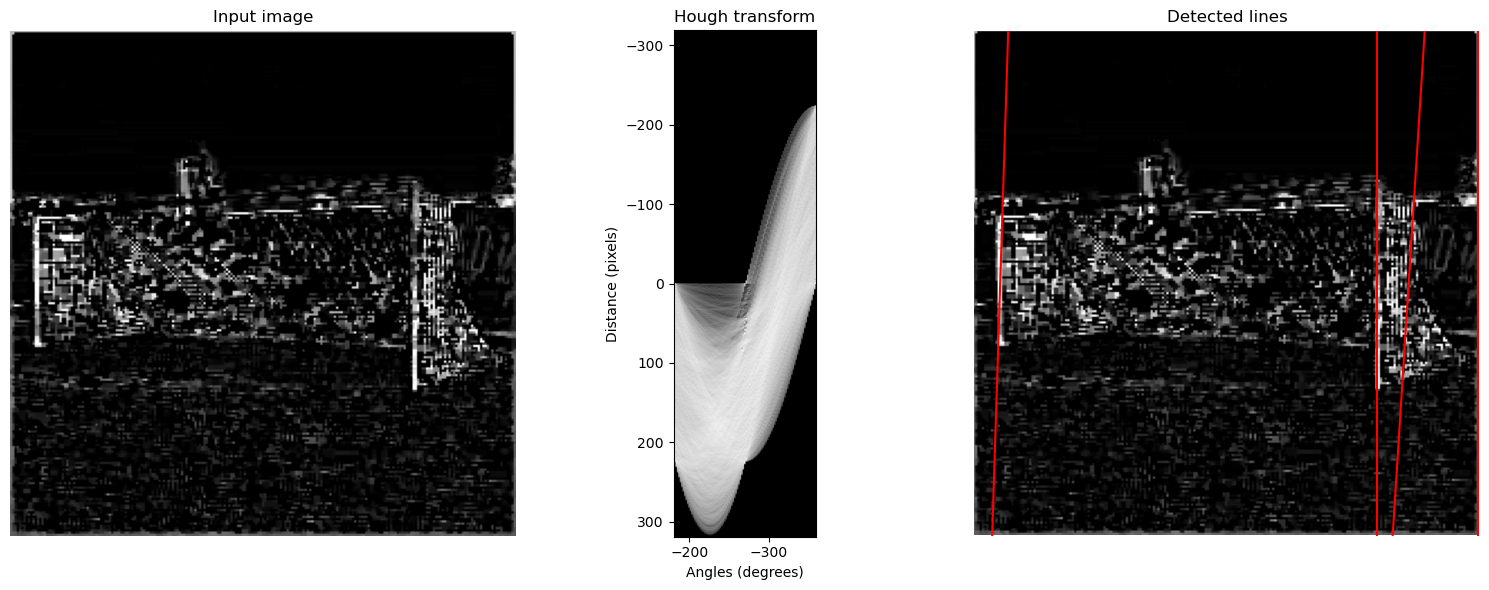

In [114]:
image1 = np.array(image)
image_org_1 = np.array(image_org)

image1 = cv2.medianBlur(image1, 3)
io.imshow(image1)
io.show()




tested_angles = np.linspace(-2*np.pi , -np.pi , 100)

hspace, theta, dist = hough_line(image1, tested_angles)
h, q, d = hough_line_peaks(hspace, theta, dist)


#Example code from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image1, cmap='gray')

origin = np.array((0, image1.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    if (angle<-6.1) or (angle>6.1) :
        angle_list.append(angle) #Not for plotting but later calculation of angles
        y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
        ax[2].plot(origin, (y0, y1), '-r')
print(angle_list)
ax[2].set_xlim(origin)
ax[2].set_ylim((image1.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

(225, 225)
(225, 225, 3)
4
[[[224 224 224   0]]

 [[  0 224   0   0]]

 [[  1 224   1   0]]

 [[223 224 223   0]]]
-282.7433388230814
-282.7433388230814
-282.7433388230814
-282.7433388230814


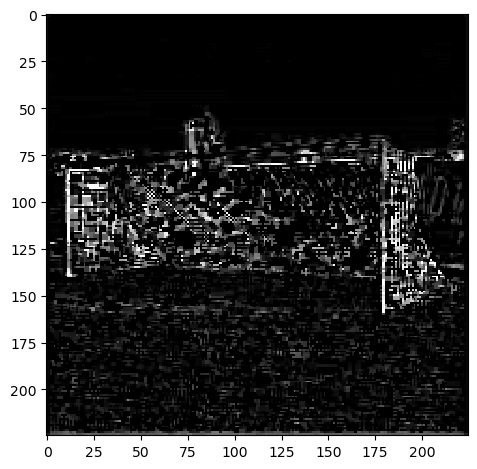

In [109]:
path = 'goal.png'

image1 = np.array(image)
image_org_1 = np.array(image_org)

image1 = cv2.medianBlur(image1, 3)

# lines = cv2.HoughLinesP(image1, 1, np.pi/180, 100, minLineLength=10, maxLineGap=250)
lines = cv2.HoughLinesP(image1,1,2,150,minLineLength=10,maxLineGap=30)
minLineLength=100
# lines = cv2.HoughLinesP(image=image1,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)
print(image1.shape)
print(image_org_1.shape)
# lines = cv2.HoughLinesP(image1, 2, np.pi/180, 350, np.array([]), minLineLength=100, maxLineGap=5)
print(len(lines))
print(lines)

threshold = -350
error = 10
    # Draw the lines
   
if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        angle = math.atan2(l[3] - l[1], l[2] - l[0]) * 180.0
        if angle>threshold: 
            print(angle)
            cv2.line(image1, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)

io.imshow(image1)
io.show()

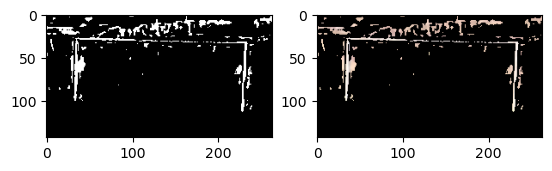

In [73]:
nemo = cv2.imread('goal.png')
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()